# Regression Demo: Polynomial Regression
The purpose of this demo is to demonstrate the ease and utility of performing polynomial regression, of which linear regression is by far the most common subtype. In this example, we will generate noisy data using a known distribution. We will then treat this data as if it was recorded from an experiment. We will try various methods of fitting the data, and plotting those fits on an appropriate scatter plot for comparison. Then, using each model, we will try to predict on a separate set of test data, and observe the quality of fit using a number of metrics. 

## Demo Instructions:

Perform the following steps:

1. Create a function that generates a number according to the following equation: 
    * y = sin(x) + 0.1 * normal(0,1) 
2. Generate two samples with x randomly chosen between 0 and 3. 
    * A training set of 10 (x,y) pairs 
    * A test set of 100 (x,y) pairs 
3. Fit the following polynomials to the training set:
    * Degree 1 polynomial (a line) 
    * Degree 2 polynomial (a quadratic) 
    * Degree 9 polynomial 
4. Create a plot showing the original data as a scatter plot and the three polynomial fits with a legend indicating the degree of the polynomial. Also, overlay the sin(x) function with a dotted line. 
5. Apply each of the 3 models to predict the y-value from the x-value in the test set. Find the root mean square error between the predictions and the true values. 

# Solutions: 

We will use the following tutorial to learn how to perform polynomial regression in Python using Scikit Learn: <a href= "https://codefying.com/2016/08/18/two-ways-to-perform-linear-regression-in-python-with-numpy-ans-sk-learn/"> Polynomial Regression Tutorial </a>

## 1. Create a function that generates a number according to the follow equation. 
### y = sin(x) + 0.1 * normal(0,1)

In [1]:
from random import randint
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import math 
from math import sqrt

def y_generator(x):
    return math.sin(x)+0.1*np.random.normal(0,1)

print(y_generator(10))

-0.5792281778967032


## 2. Generate two samples with x randomly chosen:
### 2.A. A training set of 10 (x,y) pairs

----X values for training set----
[0.01415657 0.36470736 0.41011977 0.83510816 1.27355277 1.63021483
 1.72527999 2.01224725 2.47755827 2.5343284 ]

----Y values for training set----
[0.03965624 0.31087322 0.44223552 0.68300959 1.03783215 1.06550732
 0.97765    0.85100467 0.71927226 0.52680941]


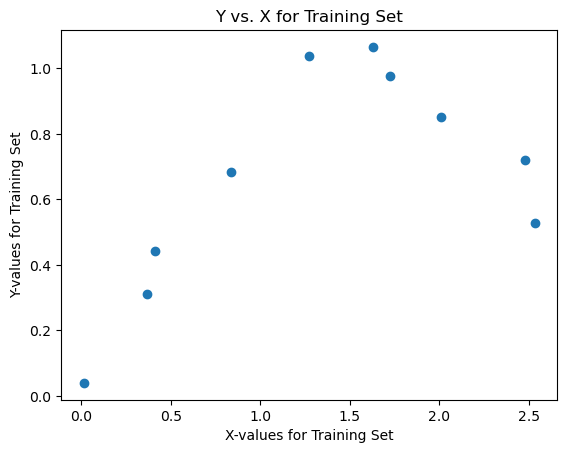

In [2]:
#Allows a tuple of values to be used as input
f2 = np.vectorize(y_generator)

np.random.seed(100)

#Getting 10 x-values from the x data set
#X_training = np.random.uniform(0,3,10)
X_training = np.sort(np.random.uniform(0,3,10))
#Getting 10 y-values from the y data set that has been computed 
y_training = f2(X_training)

print("----X values for training set----")
print(X_training)

print()
print("----Y values for training set----")
print(y_training)

%matplotlib inline
#Plots the data points in the training set
#plt.xlim(0,3)
#plt.ylim(0,1.3)
plt.plot(X_training,y_training,'o')
plt.xlabel('X-values for Training Set')
plt.ylabel('Y-values for Training Set')
plt.title('Y vs. X for Training Set')
plt.show()

## 2.B. A test set of 100 (x,y) pairs

----X values for test set----
[0.01706552 0.75727906 2.38698753 0.04576491 1.79653013 1.81141362
 0.31544306 1.14583033 0.10942817 2.67123469 2.94276257 0.17982597
 2.67163783 1.7307045  2.22743907 1.89055181 1.74552658 0.0613174
 0.63007973 1.63405463 2.30734551 0.75208569 0.85768707 2.55718526
 2.92501948 2.65455988 1.07852353 1.79657684 1.06438683 1.02057065
 0.53424297 0.71308263 0.13458685 1.51629429 1.12875736 1.7784162
 1.88982563 0.42780094 2.8015239  2.83913964 1.80688997 1.16329884
 1.08956401 0.61303583 0.83029518 0.73960764 0.52082401 2.89982908
 2.8710378  1.79392105 2.19390226 1.02115567 0.27616681 1.39049406
 1.52609668 0.26538052 1.58410567 2.97647411 1.1851078  1.00678933
 2.41635161 2.26304698 0.93919932 1.90211005 1.62121373 0.89038125
 0.3323637  0.93792089 1.37093739 1.97682021 0.76277255 1.92330378
 0.60037082 1.97287442 2.33486765 2.3387952  1.83098446 0.92700105
 2.09320472 2.57885489 1.87597127 2.94722349 2.92950038 0.50008239
 0.06953441 0.48223365 2.77049048 

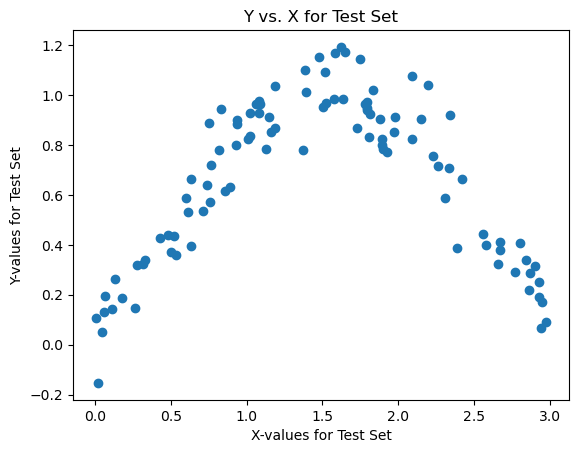

In [3]:
X_test = np.random.uniform(0,3,100)
y_test = f2(X_test)

print("----X values for test set----")
print(X_test)

print()
print("----Y values for training set----")
print(y_test)

%matplotlib inline
#Plots the data points in the test set
#plt.xlim(0,3)
#plt.ylim(0,1.3)
plt.plot(X_test,y_test,'o')
plt.xlabel('X-values for Test Set')
plt.ylabel('Y-values for Test Set')
plt.title('Y vs. X for Test Set')
plt.show()

# 3. Fit the following polynomials to the training set: 

A. The following link explains the use of the Pipeline class in Python: <a href=http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html> Link </a>. A pipeline can be used to chain several steps together; therefore, we are using it to predict variables by fitting the data. These pipeiline chains can be used to apply to training data. 

B. The following link also describes the Linear Regression class in Python, which we used in our Pipeline, so the training data could be fitted: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html. 

### 3.A. Degree 1 Polynomial (a line)

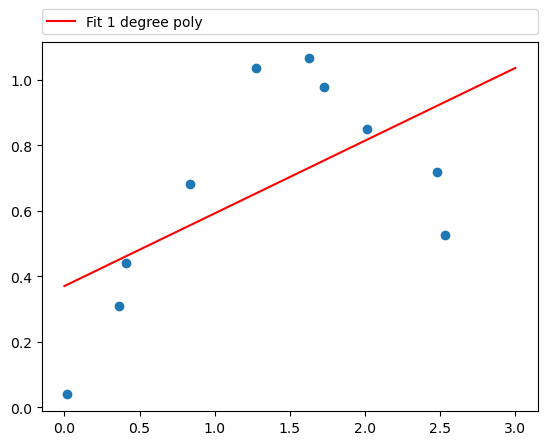

In [4]:
X_new = np.linspace(0,3)
#print(X_new)

model1 = Pipeline([('poly', PolynomialFeatures(degree=1)),('linear', linear_model.LinearRegression())])
model1 =model1.fit(X_training[:,np.newaxis], y_training[:,np.newaxis])

y_new1 = model1.predict(X_new[:, np.newaxis])


#Plotting the degree 1 fit on the test data
plt.scatter(X_training, y_training)
plt.plot(X_new, y_new1, 'r', label="Fit "+str(1)+ " degree poly")

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
               ncol=2, mode="expand", borderaxespad=0.)
#plt.xlim(0,3)
#plt.ylim(0,1.3)

plt.show()

### 3.B. Degree 2 Polynomial (a quadratic)

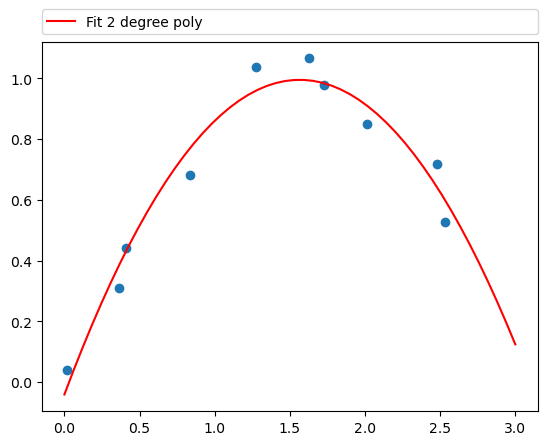

In [5]:
model2 = Pipeline([('poly', PolynomialFeatures(degree=2)),('quadratic', linear_model.LinearRegression())])
model2 =model2.fit(X_training[:,np.newaxis], y_training[:,np.newaxis])

y_new2 = model2.predict(X_new[:, np.newaxis])

#Plotting the degree 1 fit on the test data
plt.scatter(X_training, y_training)
plt.plot(X_new, y_new2, 'r', label="Fit "+str(2)+ " degree poly")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
               ncol=2, mode="expand", borderaxespad=0.)
#plt.xlim(0,3)
#plt.ylim(0,1.3)

plt.show()

### 3.C. Degree 9 Polynomial

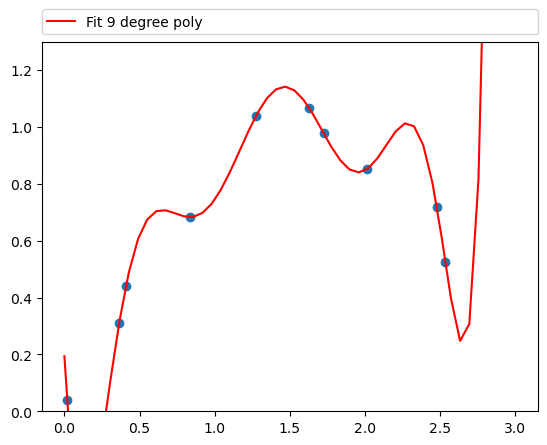

In [6]:
model9 = Pipeline([('poly', PolynomialFeatures(degree=9)),('degree 9', linear_model.LinearRegression())])
model9 =model9.fit(X_training[:,np.newaxis], y_training[:,np.newaxis])

y_new9 = model9.predict(X_new[:, np.newaxis])

#Plotting the degree 1 fit on the test data
plt.scatter(X_training, y_training)
plt.plot(X_new, y_new9, 'r', label="Fit "+str(9)+ " degree poly")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
               ncol=2, mode="expand", borderaxespad=0.)
#plt.xlim(0,3)
plt.ylim(0,1.3)

plt.show()

## 4. Create a plot showing the original data as a scatter plot and the three polynomial fits with a legend indicating the degree of the polynomial. Also overlay the sin(x) function with a dotted line.

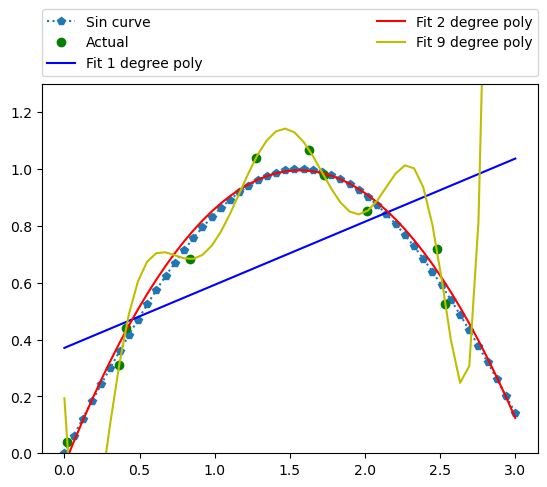

In [7]:
#Creating sin function
sin_func = np.sin(X_new)
#plot sin function and gives label for legend
plt.plot(X_new,sin_func,'p:',label='Sin curve')

plot_config=['b', 'r', 'y']
plt.plot(X_training, y_training, 'go', label="Actual")
# 3. Set the polynomial degree to be fitted betwee 1 and 3
d_degree = [1,2,9]
i = 0
for degree in d_degree:
    # 5. Create a fit a polynomial with sk-learn LinearRegression
    model = Pipeline([('poly', PolynomialFeatures(degree=degree)),('linear', linear_model.LinearRegression())])
    model=model.fit(X_training[:,np.newaxis], y_training[:,np.newaxis])
    
    predict_sk=model.predict(X_new[:,np.newaxis])
    
    plt.plot(X_new, predict_sk, plot_config[i], label="Fit "+str(degree)+ " degree poly")
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
               ncol=2, mode="expand", borderaxespad=0.)
    #plt.xlim(0,3)
    plt.ylim(0,1.3)
    i = i+1

plt.show()

## 5. Apply each of the 3 models to predict the y value from the x value in the test set. Find the root mean square error between the predictions and the true values. (The expectation is that the degree 2 polynomial should give the best prediction with degree 9 a close second). 

The metrics class in sklearn has a mean_squared_error function that we can use and then take the square root of to find the root mean squared error between the predictions and the actual values in the test set: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html. 

In [8]:
#Root mean squared error 
y_predictions1 = model1.predict(X_test[:, np.newaxis])
rms1 = sqrt(mean_squared_error(y_test,y_predictions1))
print('Root mean square error for Degree 1')
print(rms1)


#Root mean squared error 
y_predictions2 = model2.predict(X_test[:, np.newaxis])
rms2 = sqrt(mean_squared_error(y_test,y_predictions2))
print('Root mean square error for Degree 2')
print(rms2)


#Root mean squared error 
y_predictions9 = model9.predict(X_test[:, np.newaxis])
rms9 = sqrt(mean_squared_error(y_test,y_predictions9))
print('Root mean square error for Degree 9')
print(rms9)

Root mean square error for Degree 1
0.3659317205082441
Root mean square error for Degree 2
0.1113943955298435
Root mean square error for Degree 9
2.4748637125427626
